In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb

In [38]:
# Reading the train and test data from CSV files
train_data = pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\XGBM & LGBM\Titanic_train.csv")

In [3]:
test_data=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\XGBM & LGBM\Titanic_test.csv")

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
# Identifying null values in both training and testing datasets
def check_missing_values(data):
    print(data.isnull().sum())

In [15]:
check_missing_values(train_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [40]:
# Visualizing the distribution of numerical features
def perform_eda(data):
    # Histograms for numerical features
    data.hist(bins=30, figsize=(15, 10))
    plt.show()

    # Box plots for numerical features
    sns.boxplot(data=data.select_dtypes(include=np.number))
    plt.show()

    # Bar plot for survival rate by gender
    sns.barplot(x='Sex', y='Survived', data=data)
    plt.title('Survival Rate by Gender')
    plt.show()

    # Scatter plot for Age vs Fare with survival hue
    sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
    plt.title('Age vs Fare with Survival')
    plt.show()

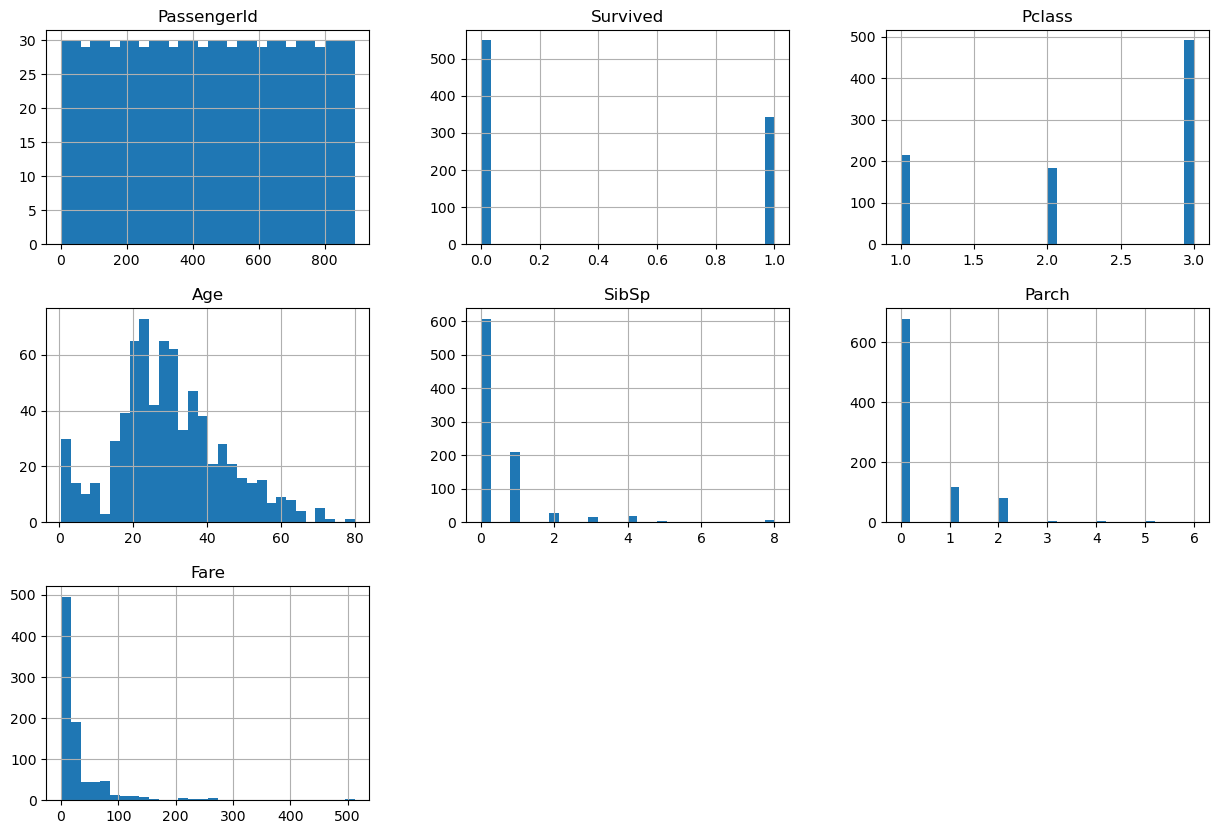

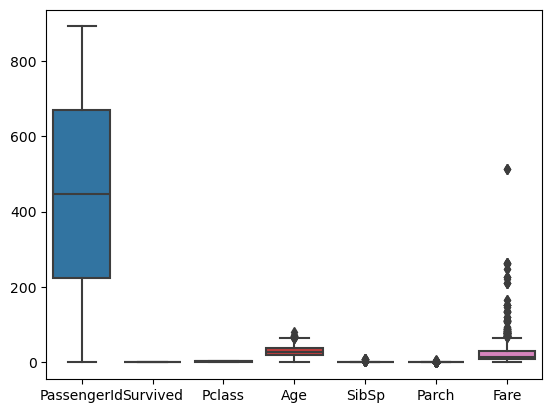

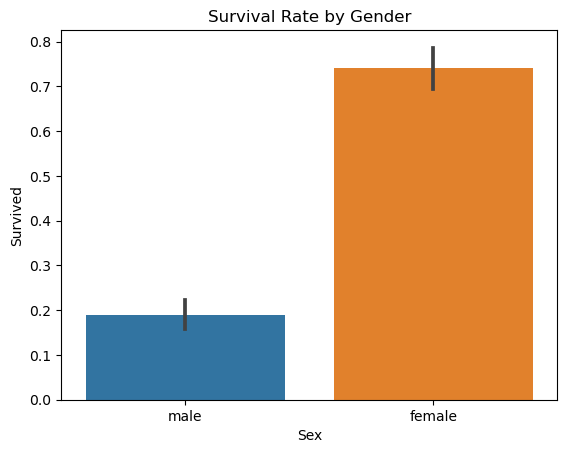

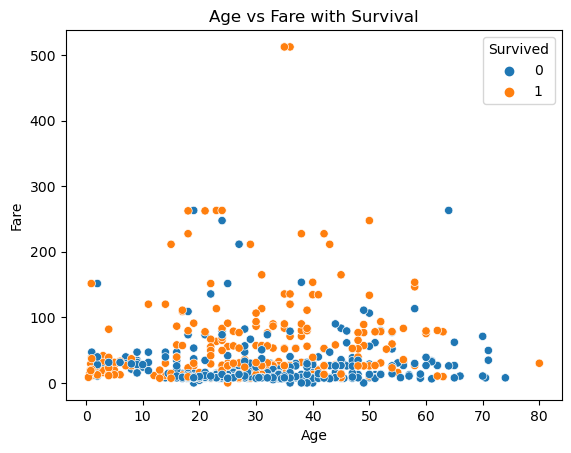

In [16]:
perform_eda(train_data)

In [20]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [41]:
# Dropping irrelevant columns if they exist
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = [col for col in columns_to_drop if col in train_data.columns]
train_data.drop(columns=existing_columns, inplace=True)

In [44]:
# Encoding categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
# Splitting the data into features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

lgb_results = {
    'Accuracy': accuracy_score(y_test, lgb_pred),
    'Precision': precision_score(y_test, lgb_pred),
    'Recall': recall_score(y_test, lgb_pred),
    'F1-Score': f1_score(y_test, lgb_pred)
}

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [31]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [32]:
xgb_results = {
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1-Score': f1_score(y_test, xgb_pred)
}

In [33]:
print("LightGBM Results:")
print(lgb_results)
print("\nXGBoost Results:")
print(xgb_results)

LightGBM Results:
{'Accuracy': 0.8268156424581006, 'Precision': 0.7945205479452054, 'Recall': 0.7837837837837838, 'F1-Score': 0.7891156462585034}

XGBoost Results:
{'Accuracy': 0.8212290502793296, 'Precision': 0.8, 'Recall': 0.7567567567567568, 'F1-Score': 0.7777777777777778}


In [34]:
metrics = list(lgb_results.keys())
lgb_scores = list(lgb_results.values())
xgb_scores = list(xgb_results.values())

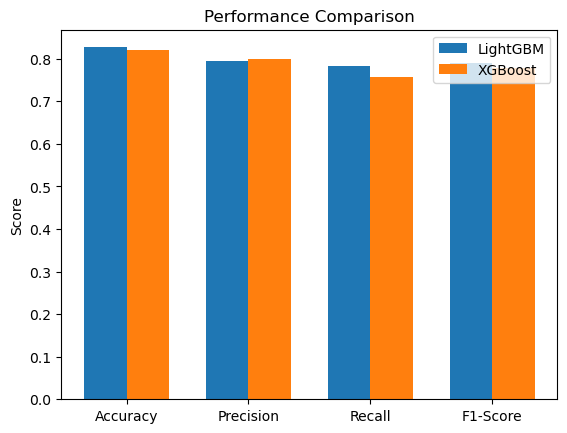

In [37]:
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lgb_scores, width, label='LightGBM')
plt.bar(x + width/2, xgb_scores, width, label='XGBoost')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.legend()
plt.show()